In [9]:
import tensorflow as tf
tf.__version__

'2.16.2'

In [10]:
# CIFAR-10 Dataset:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [12]:
# EDA by plotting some random images
import matplotlib.pyplot as plt

def show_images(train_imagegs,
                class_names,
                train_labels,
                nb_samples = 12, nb_row = 4
               ):
    plt.figure(figsize=(12,12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_imagegs[i], cmap = plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

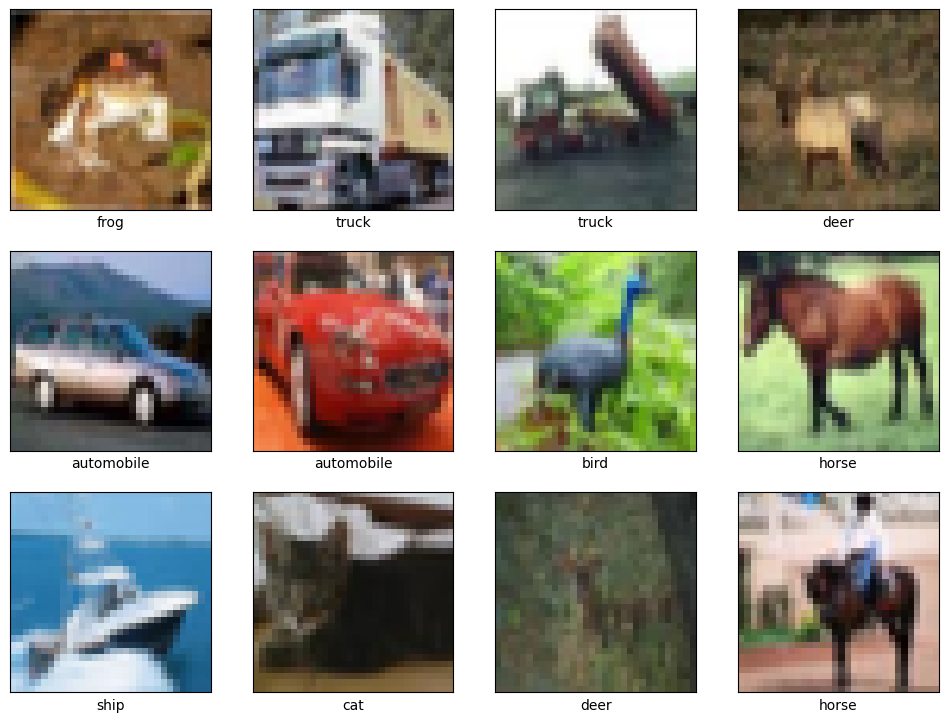

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']
show_images(train_images, class_names, train_labels)

In [15]:
# Data Processing
max_pixel_value = 255
train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [16]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [19]:
# CNN Architecture Implementation
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

in_shape = (32, 32, 3)
Filter1_size = 32
Filter2_size = 64
Filter_shapre= (3,3)
Pool_shape = (2,2)
Fully_connect_num = 128
Num_classes = len(class_names)

model = Sequential()
model.add(Conv2D(Filter1_size, Filter_shapre, activation='relu', input_shape = in_shape))
model.add(MaxPool2D(Pool_shape))
model.add(Flatten())
model.add(Dense(Fully_connect_num, activation='relu'))
model.add(Dense(Num_classes, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,914 (3.52 MB)

 Trainable params: 923,914 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Model Training
from tensorflow.keras.metrics import Precision, Recall

METRICS = metrics =['accuracy',
                   Precision(name='precision'),
                   Recall(name='recall')]

model.compile(optimizer='adam',
             loss = 'categorical_crossentropy',
             metrics = METRICS)

training_history = model.fit(train_images, train_labels,
                	epochs=30, batch_size=32,
                	validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4179 - loss: 1.6203 - precision: 0.6746 - recall: 0.1687 - val_accuracy: 0.5816 - val_loss: 1.1824 - val_precision: 0.7378 - val_recall: 0.3916
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6026 - loss: 1.1340 - precision: 0.7614 - recall: 0.4341 - val_accuracy: 0.6003 - val_loss: 1.1360 - val_precision: 0.7563 - val_recall: 0.4330
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6597 - loss: 0.9740 - precision: 0.7910 - recall: 0.5241 - val_accuracy: 0.6392 - val_loss: 1.0308 - val_precision: 0.7619 - val_recall: 0.5142
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6886 - loss: 0.8881 - precision: 0.8014 - recall: 0.5738 - val_accuracy: 0.6476 - val_loss: 1.0187 - val_precision: 0.7551 - val_recall: 0.5433
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7229 - loss: 0.7951 - precision: 0.8190 - recall: 0.6198 - val_accuracy: 0.6430

In [36]:
# Model Evaluation
import numpy as np

def performance(training_result, metric, metric_label):
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    intersection_idx = np.argwhere(np.isclose(train_perf, validation_perf, atol=1e-2)).flatten()[0]
    intersection_value = train_perf[intersection_idx]

    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label='val_'+str(metric))
    plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
    plt.annotate(f'Optimal Value: {intersection_value:.4f}',
                 xy=(intersection_idx, intersection_value),
                 xycoords='data',
                 fontsize=10,
                 color='green')
    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')

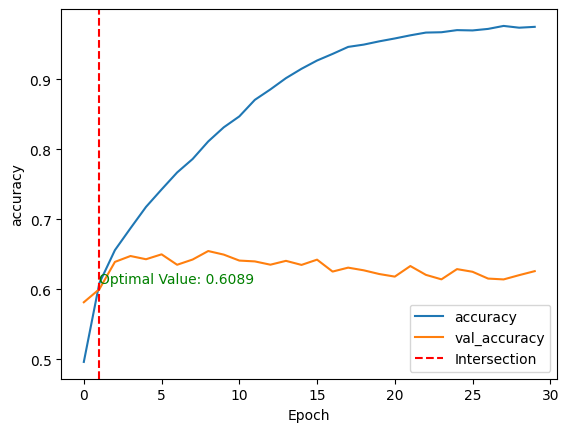

In [37]:
performance(training_history, 'accuracy', 'accuracy')

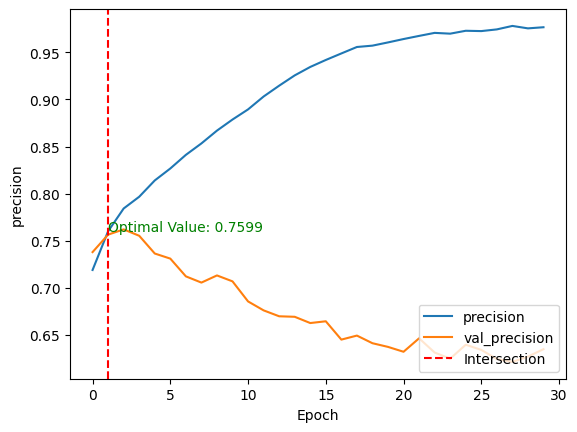

In [40]:
performance(training_history, 'precision', 'precision')